Supervised learning deals with two broad types of problems: *regression* and *classification*. In a classification problem, the target variable can take a limited number of values, which are called *categories* or *classes*. Typically, the target variable takes very few categories. And more often than not, there is not an ordered relationship between categories. As an example, think about how Facebook tags people who appear in images. Tagging a person in an image is a classification task because the number of available tags is limited. 

Although it's great to be able to solve classification problems, there's a whole class of problems that require a different approach. For example, imagine that you need to predict Walmart's gross revenue at the end of a year. In that case, you're not trying to *classify*; rather, you're trying to *quantify*. And that means that you're interested in an outcome that, in theory, can take on an infinite number of values.

You might be tempted to think that you can handle this by treating each possible numeric value as a single category. But following this through to its logical conclusion, you would need training data for each point in an infinite set of points—which is simply impossible.

When you're working with target variables that can take on a large and potentially infinite range of values, linear regression is one of your best friends.

## Regression versus classification

For a classification problem, the target variable is *categorical*. This means that the variable only takes discrete values from within a specified set. Simple versions of that set could look something like `{yes, no}` or `{heads, tails}`. The outcomes could also contain more than two values, such as `{high, medium, low}` or `{buy, rent, no purchase}`. Almost anything that can be discretely counted and labeled can be considered a categorical variable. 

In contrast, regression problems have a *continuous* outcome variable. For example, you may want to build a model that predicts the next-day closing price of Apple's stock on the Nasdaq. Obviously, Apple's stock price is not a categorical variable. Although it is somewhat bounded from above and below, it still has an infinite number of possible values.

And then there are the edge cases. Imagine that the target variable that you're interested in is the number of watches owned—`{0, 1, 2, 3, 4, 5, ... , 15}`—and you've never seen someone with more than 15 watches. Should you use regression or classification? Actually, you could use either. If you use classification, then for each observation, you're only going to be able to evaluate the likelihood of each given value. Each outcome level will be treated discretely, and the relationship between them is not predefined. But if you use regression, you're going to identify their most likely place along a continuous line, without necessarily even having bounds at `0` or `15`. Each approach has its advantages, and you should choose according to the output that you require.

Regression tasks are common in data science. Examples include stock price prediction, revenue prediction, weather forecasting, and demand prediction. In these kinds of problem areas, data scientists are often interested in outcome variables that are continuous—or variables that have so many values that it's easiest to treat them as continuous.

## Formulating a regression problem 

*Linear regression* models the relationship between one or more observed features and some continuous target variable. Based on observed data, you try to derive a function that describes the target as a function of the feature set. This function produces a line where you can look up feature values and find predicted target values. 

Now, explore this with an example. Consider a fictional European football league called *Fantastic football league*. (Here, *football* refers to what the world outside the USA means by football—soccer!) Say that you have collected some data about the average number of goals scored with respect to the number of shots in a match. The data is presented in the chart below:


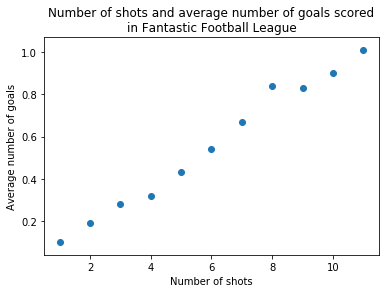

 
Just eyeballing this data, you can see that there's a positive correlation between number of shots and number of goals scored in the observed cases. This scatter plot gives you the intuition that there's an underlying relationship between the number of shots taken and the number of goals scored, but it doesn't quite allow you to make a prediction about unobserved cases (for example, when a team scores an average number of 6.634 goals per match). 

What you need is a way to extract a *model*—a mathematical description—of the underlying relationship between feature and target. Conceptually, you want to find a line that you can draw through the scatter plot of your known data. The line should represent the relationship between the feature and the target reasonably well, and it should also do a good job at predicting values that were not directly observed in your data. In short, you want something like the chart below:

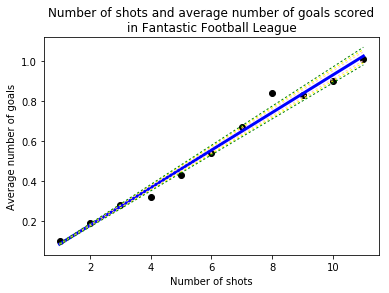

Here, you have your original scatter plot of data, with a positively sloping line (<font color=blue>the blue line</font>) that your observed cases appear to cluster around. You want to answer the following question: what are the expected number of goals when a team takes 8.39 shots on average? To do this, look up what the y-value (average number of goals) is when the number of shots is 8.39 (eyeballing it, it looks like $y$ is at about 0.7). Again, you don't have an observed case of 8.39 shots, but the model makes a prediction about what you would expect the number of goals to be, based on the cases that it has seen.

This example is simple and stripped down, but hopefully, it starts to give you a sense of the power of regression models. If you can build models that uncover underlying linear relationships in data, you gain the power of prediction. This kind of knowledge can truly drive business value.

## How does linear regression work?

Start by exploring how linear regression could help to find the relationship that you want using your single-feature, single-target football data. With linear regression, you plot each observation on an x- and y-axis and then draw a line that best fits the observed cases. As the chart below demonstrates, the fitted blue line represents a linear relationship between the number of shots and the average number of goals scored:


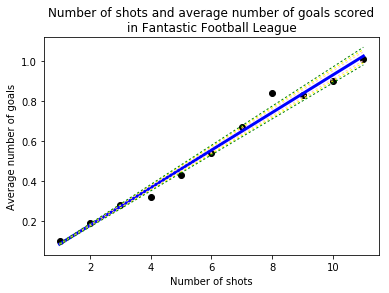

Actually, <font color=blue>the blue line</font> just represents a linear function, which in turn represents the relationship between the number of shots and the average number of goals scored. 

## Building regression models as an iterative process

In the remaining lessons in this module, you'll get into the nitty-gritty details of the process for creating linear regression models. But here at the outset, you'll start with a high-level overview of the main steps.


### Step 1: Designing a model

The first step is to choose an initial set of features that you believe have a relationship with the target variable. The football example includes only one feature. However, in a more realistic dataset, you will have more than one feature that can contribute to your model. Choosing the initial feature set stems from the feature engineering and exploratory analysis that you typically do before the model selection.

Assuming that you have two features ($x$ and $z$) and one target ($y$), the initial model can be expressed in the following form:

$$ y = \alpha + \beta x + \theta z + \epsilon$$
  
In the formula above, $\alpha$ is called the *bias term* or *intercept term*, $\beta$ and $\theta$ are called the *coefficients*, and $\epsilon$ is called the *error term*. $\alpha$, $\beta$, and $\theta$ are parameters of the model that reflect the "predictable" variation in the target, while $\epsilon$ corresponds to the "unpredictable" variation in the target, often informally referred to as *noise*.


### Step 2: Estimating the coefficients

The next step is to find the optimal parameters of your model. This is the same thing as drawing <font color=blue>the blue line</font> in the football example. If you look at the chart above more closely, you'll see that there are some other lines apart from the blue one. Actually, you can draw infinitely many lines in that graph that look more or less similar to the blue line. So, how does linear regression choose the best line among an infinite number of alternatives? It uses an optimization algorithm called *ordinary least squares* (OLS).

OLS is a relatively simple algorithm that you'll look at later in this module. It tries to minimize the sum of the squared distances between each point and the line, and it chooses the line that minimizes this sum. This minimization is the optimization that the linear regression method does. After this optimization process, you get a function that is represented by the blue line in the chart. In the literature, this step is called *estimation*. 
  
### Step 3: Assumptions of linear regression

OLS regression models specify a very simple functional form for the relationship between the target and features. Consequently, there are a number of implicit theoretical assumptions that are made about the features, response, and error term when building such models. There are six core assumptions:

  1. The model is correctly specified.
  2. The error term has a mean of 0 (a consequence of the *exogeneity* assumption).
  3. The error term is uncorrelated with the regressors (also a consequence of the exogeneity assumption).
  4. The error term has constant variance across all observations (in other words, there's *homoscedasticity*).
  5. The errors are uncorrelated between observations (in other words, there's no *autocorrelation*).
  6. The predictors are linearly independent (in other words, there's no perfect *multicollinearity*).

These assumptions probably sound abstract at the moment, but don't worry. Later in this module, you'll review these assumptions. You'll also explore some approaches that you can take to use linear regression even when your model doesn't meet these conditions. Once you check for these conditions and try to fix your model if it doesn't meet some of the conditions above, then you can move to the next step.
  
### Step 4: Understanding the relationship between features and target

From the previous steps, you get some values for the coefficients of the features that capture the relationship between the features and the target variable. You can quantify the relationship between the target variable and each feature using the estimated coefficients. Specifically, the estimated function that the <font color=blue>blue line</font> represents is as follows:

$$ average \enspace number \enspace of \enspace goals = -0.01 + 0.09 \enspace X \enspace number \enspace of \enspace shots $$

This function implies that if the number of shots increases by 10, then the average number of goals increases by 0.9.


### Step 5: Evaluating goodness of fit

To measure how well a model explains the information in the outcome variable, look at the performance of the model on training data. The training data is composed of the records that you use to estimate the model. As you learned earlier in this module, to measure the performance of classification models, you use a confusion matrix to generate metrics like accuracy, precision, and recall.

However, creating a confusion matrix won't work for the continuous variables that you encounter in regression problems—an infinite confusion matrix would be, well, infinitely confusing. Instead, you use metrics like *R-squared* or *adjusted R-squared* to evaluate your model's goodness of fit (more on these metrics later in this module). If you are happy with your model's performance, then you can proceed to the next steps. But if you think that your model doesn't explain the target variable very well, then you need to change something in your model and go back to step two (the estimation phase). For example, you may need to add some extra features.
  
### Step 6: Predicting the unknown

Regression models are quite flexible in predicting unknown target values. This is a consequence of how you estimate the relationship between the features and the target variable. Based on a finite set of observed cases, you generate a line that can, in principle, make a prediction about any unobserved value. Here, *prediction* means coming up with outcome values for the observations that have not been previously observed. 

In the test set, you can look at the difference between the correct target value and what your model predicted it would be. When you think about prediction in this way, it gives you a way to objectively determine how well your model will perform on previously unseen observations. 

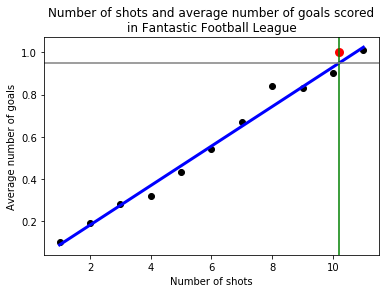

See how that works in practice by returning to the football example, where you created a model that estimated the average number of goals as a function of number of shots. Furthermore, imagine that you've been brought on to advise a football coach about the strategy that they should undertake with their players—should the players take more or fewer shots?

As you can see in the chart above, it's an unseen observation (the <font color=red>red point</font> in the graph) for the model that you estimated. Now, you want to predict the average number of goals that you can achieve if you succeed in your plan. Because you've already estimated a relationship, you can do this by just feeding in the x-value of the observation (where the <font color=green>green vertical line</font> intersects with the x-axis) to the function that you estimated. The result is the prediction (it is where the <font color=grey>grey horizontal line</font> intersects with the y-axis). So, you can expect to score almost 0.95 goals on average. If you have the information regarding the correct value of the average number of goals for the red point (if this point is from your test set, then you have this information), you could measure the success of your model's prediction—which you'll learn about next.
  
### Step 7: Measuring test performance

So you have a function that predicts how many goals you can expect to be scored per match, based on the number of shots. But will this prediction be reliable in practice? Should your strategy rest upon that information? To determine this, you need to evaluate your model on a test set. The test set is data that you hold back—data that the model was not trained on and that you can use to see how well the model performs on new cases.

As in the case of measuring training performance, you cannot use a confusion matrix to assess the test set performance of regression models. Instead, you'll use metrics like *root mean squared error* (RMSE) to evaluate your models. You'll learn about this metric later in this module.

Once you get the test set performance of your model, you can judge whether it is satisfactory or not. If you think that your model is doing a great job, then you can rely on the predictions it generates, and you can use those predictions to direct your football team's strategy. But, if you think that your model is not good enough, then you should go back to step two (the estimation phase) and try other model alternatives. 

## From simple to more complex linear regression models

In this lesson, you illustrated the regression problem using a fictional dataset that only includes a feature and a target. However, in the real world, you'll usually work with datasets that include more than one feature. Thankfully, linear regression models can handle many features and even multiple targets! These kinds of linear models are called *multivariable* and *multivariate*, respectively. Throughout this module, you'll explore the power of linear regression models using an insurance cost dataset that involves several features. 

Moreover, the term *linear* in the name of the linear regression model doesn't indicate that the fitted line is a linear one. Instead, it refers to the linear relationship between the target variable and the coefficients of the features. In fact, linear regression models can estimate relationships that are quadratic, cubic, or any polynomial order. In the rest of this module, you will explore how to estimate nonlinear relationships between a target and a feature (or multiple targets and multiple features) using linear regression models.